## Gradio Pets

In [58]:
%pip install -Uqq fastai
%pip install -Uqq fastai gradio

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [59]:
from fastai.vision.all import *
from pathlib import Path
import gradio as gr

def is_cat(x): return x[0].isupper()

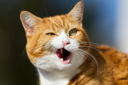

In [60]:
img = PILImage.create('cat.webp')

img.thumbnail((128,128))
img

In [61]:
learn = load_learner('model.pkl')

In [62]:
learn.predict(img)

('True', tensor(1), tensor([9.1822e-10, 1.0000e+00]))

In [63]:
learn.export('model.pkl')

In [64]:
# Define a function for model inference
def classify_image(inp):
    img = PILImage.create(inp)
    img.thumbnail((128,128))
    pred,pred_idx,probs = learn.predict(img)
    if pred == "class_A":  # Replace "class_A" with the actual class name for dogs
        result = f"The image is a Dog with probability {probs[pred_idx]:.4f}"
    else:
        result = f"The image is look like a Cat {probs[pred_idx]:.4f}"
    return result

In [65]:
image = gr.Image()
label = gr.Label()
examples = ["cat.webp", "dog.webp", "bear.jpeg"]

In [66]:
# Launch a gradio interface
gr.Interface(fn=classify_image, inputs="image", outputs="text", examples=examples).launch()

Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.
